# Matplotlib Defaults & Fonots

[포스트 링크](https://jehyunlee.github.io/2020/02/13/Python-DS-2-matplotlib_defaults_and_fonts/)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
print(mpl.__version__)

3.1.1


<br>

# 1. 기본값 설정

## 1.1 rcParams

- Matplotlib에서 그리는 그래프, 폰트 등의 기본값을 설정합니다.
- `plt.rcParams`와 `mpl.rcParams` 모두 동일한 결과를 도출하므로 편한 것을 사용하면 됩니다.
- 사용 가능한 `rcParams` 항목 : `plt.rcParams`
- 초기값으로 되돌리기 : `mpl.rcParams.update(mpl.rcParamsDefault)`

In [5]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['figure.dpi'] = 72
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = True

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.transparent'] = True

plt.rcParams['font.family'] = 'Dejavu Sans'
plt.rcParams['font.size'] = 14

#plt.rcParams

<br>

## 1.2 rc

- 1.1에서 설명한 `plt.rcParams`는 warning message를 보일 때가 있습니다.
- `matplotlib.rc()`를 사용하면 warning message없이 기본 설정을 변경할 수 있습니다.
- `mpl.rc()`와 `plt.rc()`는 동일하게 작동하므로 편한 것을 사용하면 됩니다.

- 1.1의 예제 코드는 다음 코드와 정확히 일치합니다. 

In [6]:
from matplotlib import rc

rc('figure', figsize=(5,5))
rc('lines', linewidth=4)
rc('axes', grid=True)

rc('lines', linewidth=2, color='r')
rc('savefig', dpi=200, transparent=True)
rc('font', family='Denaju Sans', size=14)

#plt.rcParams

- 같은 항목(`lines` 등)은 한 줄로 여러 속성을 동시에 정의할 수 있습니다.
- 이 특징을 확장하면 다음처럼 dictionary 형태로 깔끔한 관리가 가능합니다.

In [7]:
font = {'family': 'Denaju Sans',
        'size': 14,
        'weight': 'bold'}

rc('font', **font)

- 설정을 초기값으로 복원하려면 `mpl.rcdefaults()`를 실행하면 됩니다.

<br>

## 1.3 style sheets

- 그래프 배경색, 색상 표, 폰트, 선 굵기 등이 일괄적으로 정해진 세트입니다.
- 본인 스타일에 맞는 것을 가져다 사용하면 된다.
- 사용 가능한 `style` 항목 : `plt.style.available`
- 기본 설정으로 되돌리기 : `plt.style.use('default')`

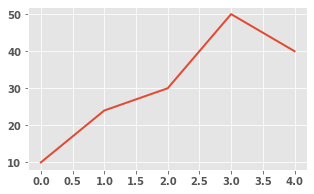

In [9]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(5,3))

data = [10, 24, 30, 50, 40]
ax.plot(data)
plt.savefig('2_mpl_6.png', dip=72)
plt.show()

<br>

## 1.4 rc_file : 기본값 custom 설정 파일

- 1.1 ~ 1.3은 필요할 때 기본값 설정을 변경하는 일이다.
  - 예를 들면 EDA Jupyter Notebook을 하나 만들 때, 처음에 초기값들을 잡아놓고 실행할 수 있다.
- 자주 사용하는 설정을 어딘가 저장해두고 `ctrl + c/v`로 불러올 수도 있겠지만, 이것마저도 은근히 귀찮을 수 있다.
- 상황에 따라 다른 초기값을 불러오고 싶다면 **여러 개의 다른 파일로 저장해놓고 불러오는 것이 가장 좋은 방법**일 수 있다.

- matplotlib는 파일 입력을 통한 기본값 일괄 설정을 지원한다.

<br>

### 1.4.1 먼저, matplotlib이 불러오는 기본값 설정 파일을 확인

- `mpl.matplotlib_fname()`

In [10]:
mplfile = mpl.matplotlib_fname()
print(mplfile)

C:\Users\shkim\AppData\Local\conda\conda\envs\python36\lib\site-packages\matplotlib\mpl-data\matplotlibrc


<br>

### 1.4.2 파일을 복사해서 연다.

- 파이썬 기본 명령어(`shutil` 등)을 사용해서 가져온다.

In [12]:
import shutil, os

currpath = os.getcwd()
currmplfile = os.path.join(currpath, 'my_mplfile')
shutil.copy(mplfile, currmplfile)

'C:\\shkim\\jupyter notebook\\reference-posts\\posts\\Visualization\\Pega-Devlog\\my_mplfile'

<br>

### 1.4.3 부분적으로 수정

- 수정 전후의 차이를 알 수 있도록 수정하기 전에 먼저 그림을 그려본다.

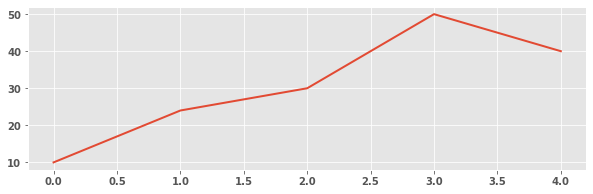

In [13]:
fig, ax = plt.subplots(figsize=(10,3))

data = [10, 24, 30, 50, 40]
ax.plot(data)

plt.show()

<br>

- 복사해 온 `my_mplfile`에서 원하는 부분을 수정한다.
- 간단하게 `line.linewidth`를 두껍게(1.5 -> 3), `line.linestyle`를 실선에서 점선으로(`-` -> `:`) 수정해 준다.
- 수정한 항목은 맨 앞의 `#`를 지워서 활성화하는 것을 주의해야 한다.

<br>

- 이제 `mpl.rc_file()`을 실행해서 수정한 설정파일을 불러온다.

In [15]:
mpl.rc_file('my_mplfile', use_default_template=False)
#mpl.rcParams

<br>

### 1.4.4 똑같은 그림을 그려본다.

- 1.4.3의 코드를 다시 실행한다.
- 선의 굴기와 모양이 변한 것을 확인할 수 있다.

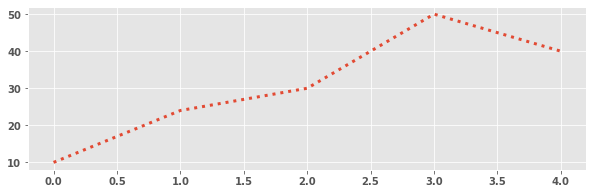

In [16]:
fig, ax = plt.subplots(figsize=(10,3))

data = [10, 24, 30, 50, 40]
ax.plot(data)

plt.show()

<br>

- matplotlib 본연의 기본값으로 되돌릴 때는 `mpl.rc_file_defaults()`를 실행하면 된다.

In [18]:
mpl.rc_file_defaults()

<br>

# 2. Font

- 그래프에 들어가는 글자들의 폰트를 설정한다.
- `plt.suptitle`, `ax.title`, `ax.xlabel`, `axes.xticklabels`, `ax.annotate`, `ax.text` 등으로 곳곳의 폰트를 설정할 수 있다.

<br>

## 2.1 `mpl.font_manager.FontProperties`

- 일반적으로 `mpl.font_manager.FontProperties`를 사용해서 설정할 수 있다.
- `FontProperties`를 이용해 폰트 종류, 크기, 스타일 등을 설정한 후 text 입력 시 `fontproperties=`로 입력한다.

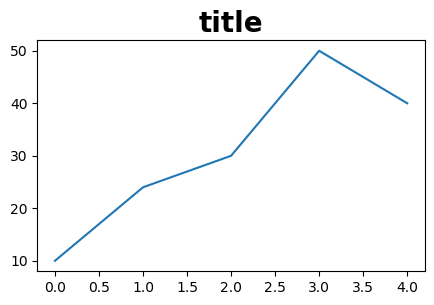

In [19]:
# font setting
font_setting0 = mpl.font_manager.FontProperties()
font_setting0.set_family('Dejavu Sans') # 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
font_setting0.set_size(20)
font_setting0.set_style('normal') # 'normal', 'oblique', 'italic'
font_setting0.set_weight('bold')

fig, ax = plt.subplots(figsize=(5,3))

data = [10, 24, 30, 50, 40]
ax.plot(data)
ax.set_title("title", fontproperties=font_setting0)

plt.show()

<br>

## 2.2 `fontdict`

- 폰트 설정을 dictionary type으로도 입력할 수 있다.
- dictionary의 key와 value는 [matplotlib User's Guide](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)에 정리되어 있다.
- `plt.suptitle` [공식문서](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html)에는 `fontdict` 항목이 없지만 사용 가능하다.

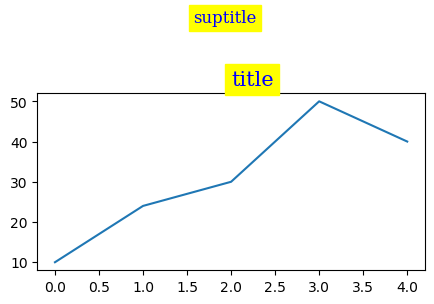

In [23]:
# font setting
fontdict = {
    'family': 'serif',
    'size': 15,
    'backgroundcolor': 'yellow',
    'color': 'blue',
    'weight': 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'left'
}

fig, ax = plt.subplots(figsize=(5, 3))

data = [10, 24, 30, 50, 40]
ax.plot(data)
ax.set_title("title", fontdict=fontdict)

plt.suptitle("suptitle", fontdict=fontdict)
plt.subplots_adjust(top=0.7)
plt.show()

<br>

## 2.3 글자가 깨질 때

- matplotlib는 -(minus) 기호를 표시할 때 unicode minus(U+2212)를 ASCII hypen(U+002D) 보다 우선적으로 사용한다.
- `plt.rcParams["axes.unicode_minus"] = False`를 통해 ASCII hypen을 우선 사용하도록 변경할 수 있다.
- 하지만 때로는 그럼에도 불구하고 깨져서 출력되는 경우들이 있다. (ex. -가 지수에 표시되는 경우)
- 그 외에도 non-latin glyph가 제대로 표시되지 않는 경우에는 `font.family` 앞에 새 폰트를 넣어주는 방식으로 해결할 수 있다.

In [24]:
plt.rcParams['font.sans-serif'] = ['NanumGothic', 'sans-serif']

- [공식적으로 알려진 matplotlib 한글 사용 방법](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb)은 다음과 같다.

In [26]:
import matplotlib.font_manager as fm # 폰트 관련 용도
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#print(font_list)

In [29]:
# font_list에서 설치된 폰트를 확인 후에 사용하고자 하는 폰트를 적어준다.
fontpath = 'C:/Windows/Fonts/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname=fontpath, size=10).get_name()
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

- 간단하게는 이렇게만 넣어줘도 한글을 출력할 수 있다.

In [30]:
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

- 운영체제와 관계없이 한 덩어리의 코들르 실행해서 한글을 구현하고자 한다면 다음 코드 뭉치를 복사하여 실행하면  편리하다.
- Windows와 Linux에 적용되며, Linux에서 처음 실행 시는 `!apt-get` 앞에 있는 `#`를 제거하고 실행하여 폰트를 설치해야 한다.

In [31]:
import os, copy, sys, platform
system = platform.system()
system

'Windows'

In [32]:
if system == 'Windows':
    datapath = os.getcwd() + '\\'
    imagepath = datapath + 'images\\'
    
    # ttf 폰트 전체 개수
    font_list[:10]
    
    f = [f.name for f in fm.fontManager.ttflist]
    f[:10]
    
    [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    
    path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
    font_name = fm.FontProperties(fname=path, size=50).get_name()

    print(font_name)
    plt.rc('font', family=font_name)
    print("# matplotlib 한글 사용 가능")

elif system == 'Linux':
    datapath = os.getcwd() + '//'
    imagepath = datapath + 'images//'
  
#     !apt-get update -qq
#     !apt-get install fonts-nanum* -qq

    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
    font_name = fm.FontProperties(fname=path, size=10).get_name()

    print(font_name)
    plt.rc('font', family=font_name)

    fm._rebuild()
    mpl.rcParams['axes.unicode_minus'] = False
    print("# matplotlib 한글 사용 가능")

else:
    sys.exit('ERROR: Sorry, my code has compatibility with Windows and Linux only.')    

NanumGothicCoding
# matplotlib 한글 사용 가능


- 위 설정 후 한글이 들어간 그래프를 그려보자.

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

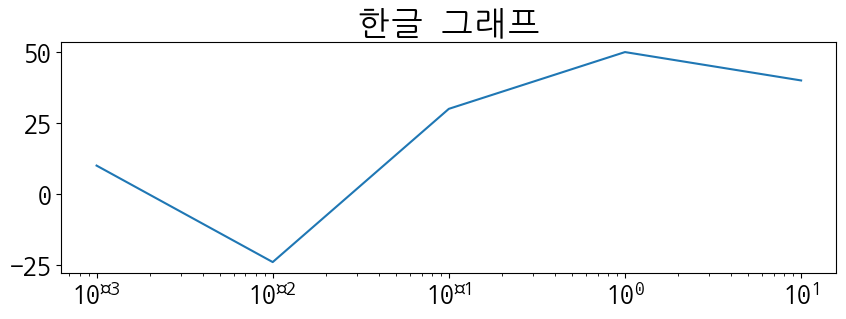

In [34]:
# log의 지수가 깨지는 문제를 잘 보여주기 위해 폰트 크기를 키운다.
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(figsize=(10,3))

data_x = [0.001, 0.01, 0.1, 1, 10]
data_y = [10, -24, 30, 50, 40]

ax.plot(data_x, data_y)
ax.set_title('한글 그래프')
ax.set_xscale('log')

plt.show()

- 마이너스를 ASCII code에서 사용하게 했기 때문에 y축의 -25는 정상적으로 표시된다.
- 그럼에도 불구하고 unicode 문제가 발생하여 지수의 -가 벌레처럼(¤: U+00A5)표시된다.
- `superscript minus`(-)는 U+207B이라는 독자 코드를 가지고 있지만, matplotlib에서는 U+2212를 올려서 사용하고 있다.

- 가장 간편한 해결책은 U+2212를 가지고 있는 다른 폰트 중 하나를 불러오는 것입니다.
- 여러가지를 시험한 결과 나눔고딕과 가장 유사한 대체폰트는 Liberation Sans였습니다.
- 그 외에 ubuntu 16.04 기본 폰트 중에서는 Liberation Sans Narrow, Dejavu Sans, Ubuntu도 쓸만합니다.
- 아래 한 줄을 위 코드에 추가해서 문제를 해결합니다.

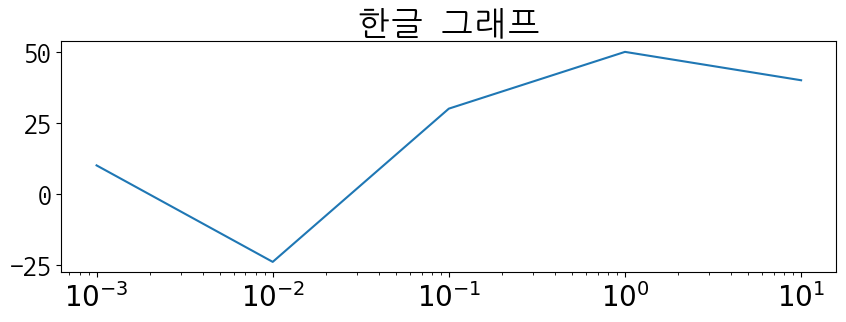

In [36]:
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(figsize=(10,3))

data_x = [0.001, 0.01, 0.1, 1, 10]
data_y = [10, -24, 30, 50, 40]

ax.plot(data_x, data_y)
ax.set_title('한글 그래프')
ax.set_xscale('log')
plt.xticks(fontname='Liberation Sans')

plt.show()